#Random Walk란?

##정의

시계열 데이터 $X_t$가 아래와 같은 모형을 따른다고 해보자.<br>
 - $X_t$ = $X_{t-1}$ + $Z_t$
 - $X_t = \mu + X_{t-1} + Z_t$

($\mu = E(X_t - X_{t-1})$, $Z_t$는 평균이 0이고 분산이 $\sigma^2$인 백색잡음, $X_0$은 초기값)<br>
<br>
$Z_t$가 대칭분포인 경우 이전 데이터 값 $X_{t-1}$가 주어졌을 때 그 다음 데이터 값 $X_t$가 높아지거나 낮아질 확률이 0.5여서 백색잡음 이라고 함.<br>
<br>
Random Walk를 자기 회귀모형식으로 표현하면 $AR(1)$이 되고 그 계수가 1인 것을 알 수 있으며 이는 정상성(stationary)를 만족하지 않는다. 
- $(1-\phi_1B)X_t = Z_t$

$Phi_1 = 1$<br>
이때 특정방정식
 - $1-\phi z = 0$

은 $\phi_1 = 1$ 인 경우 근은 $z = 1$이며 단위근(Unit Root)을 가진다고 한다. 또한 단위근을 가지는 경우 Random Walk 를 단위근 비정상성 모형이라고 한다. <br>
<br>
단위근이 문제가 되는 이유는 $\phi_1$추정치에 편향이 생기며 다변량 시계열 분석시 두 시계열에 실제로 관계가 없지만 관계가 있는 가짜회귀 모형을 만들 수 있다고 한다.

##성질

1. Random Walk는 예측 불가능하다.
2. Random Walk의 예측 오차 분산은 무한대로 발산한다.

Random Walk $X_t$의 예측 오차 분산을 계산하기 위해 $X_t$를 백색잡음 $Z_t$로 표현하면 $X_t = X_0 + Z_t + \cdots + Z_1$ 이다. Random Walk with Drift의 경우는 $X_t = t\mu + X_0 +  Z_t + \cdots + Z_1$ 보통 백색잡음을 충격(Shock)이라고도 하는데 위의 표현식이 이야기해주는 것은 과거 충격효과가 현재에도 그대로 영향을 미친다는 것을 의미한다. 이는 시계열이 강한 기억(Strong Memory) 성질을 가지고 있다는 것이다.<br>
<br>
n+l 시점의 예측값에 대한 예측 오차 e_{n+l,n} = X_{n+l}-X_{n+l,n}의 분산은 다음과 같다. 
 - $Var(e_{n+l,n})$ = $Var(X_{n+l}-X_{n+l,n})$ = $Var(Z_{n+l} + \cdots Z_{n+1})$ = $l\sigma^2$

Random Walk with Drift 모형의 경우는<br>
$Var(e_{n+l,n})$ = $Var(X_{n+l}-X_{n+l,n})$ = $Var(lμ+Z_{n+l} + \cdots Z_{n+1})$ = $l\sigma^2$
<br> 
어느 경우에나 예측 분산은 시점 l이 커짐에 따라 무한대로 발산하는 것을 알 수 있다. 예측 분산이 무한대로 발산한다는 것은 $X_{n+l}$이 어떠한 값도 가질 수 있다는 것을 의미하므로 예측치 $X_{n+l,n}$ 이 시점 l이 커질수록 유용하지 않다는 것을 의미한다.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random as r

In [6]:
lst = []
lst.append(0)
for i in range(100):
  random = r.randint(1,100)
  if random % 2 == 0 :
    lst.append(random*1)
  else:
    lst.append(random*-1)

In [7]:
lst

[0,
 98,
 66,
 10,
 -5,
 -61,
 78,
 -31,
 -21,
 -5,
 -21,
 -17,
 -75,
 54,
 -17,
 60,
 -53,
 -35,
 -79,
 -31,
 12,
 -79,
 -5,
 -57,
 56,
 4,
 56,
 46,
 42,
 60,
 38,
 2,
 20,
 62,
 32,
 66,
 -73,
 -95,
 70,
 -39,
 -45,
 -87,
 70,
 -91,
 70,
 56,
 -29,
 16,
 -61,
 48,
 -17,
 -57,
 44,
 90,
 18,
 -49,
 30,
 22,
 70,
 50,
 84,
 -19,
 -21,
 50,
 -75,
 56,
 -57,
 42,
 -27,
 100,
 -65,
 50,
 -25,
 52,
 -97,
 -21,
 -81,
 32,
 -87,
 14,
 -39,
 -5,
 40,
 -89,
 -95,
 40,
 52,
 -99,
 68,
 48,
 54,
 -3,
 14,
 -95,
 20,
 76,
 66,
 -9,
 -11,
 -5,
 32]

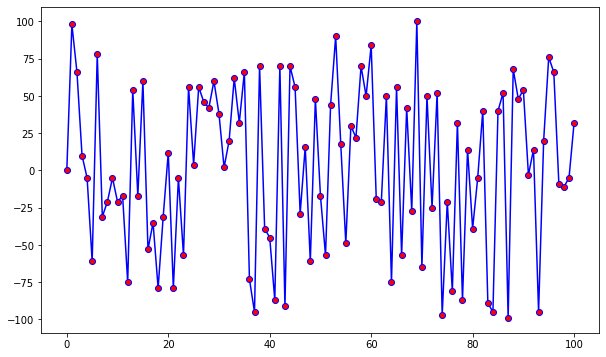

In [11]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.plot(lst, marker = 'o',markerfacecolor = 'red',color = 'blue')
plt.show()

In [12]:
np.array(lst).mean()

2.4356435643564356

평균은 시점이 커질수록 0으로 수렴하게 된다.

In [13]:
np.array(lst).var()

2995.7706107244385

시점이 커질수록 분산은 더욱 더 커져서 발산하게 됨.